# Assignment 6

In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Import Data

In [2]:
trump_tweets = pd.read_csv('realDonaldTrump.csv',encoding='mac_roman')
obama_tweets = pd.read_csv('BarackObama.csv',encoding='mac_roman')

#### View Data

In [3]:
trump_tweets

,created_at,text,url,replies,retweets,favorites,user
0,10/23/17 12:30,I had a very respectful conversation with the ...,https://twitter.com/realDonaldTrump/status/922...,46228,10243,49468,realDonaldTrump
1,10/23/17 11:53,Two dozen NFL players continue to kneel during...,https://twitter.com/realDonaldTrump/status/922...,31419,14006,62406,realDonaldTrump
2,10/23/17 11:42,There will be NO change to your 401(k). This h...,https://twitter.com/realDonaldTrump/status/922...,9552,13719,62662,realDonaldTrump
3,10/22/17 12:08,It is finally sinking through. 46% OF PEOPLE B...,https://twitter.com/realDonaldTrump/status/922...,56238,25102,112890,realDonaldTrump
4,10/22/17 12:02,Wacky Congresswoman Wilson is the gift that ke...,https://twitter.com/realDonaldTrump/status/922...,32136,21573,97145,realDonaldTrump
...,...,...,...,...,...,...,...
3227,8/24/16 22:39,Thank you for your support!\r#AmericaFirst #Im...,https://twitter.com/realDonaldTrump/status/768...,1693,6441,18401,realDonaldTrump
3228,8/24/16 21:32,"A great afternoon in Tampa, Florida. Thank you...",https://twitter.com/realDonaldTrump/status/768...,1148,4837,16968,realDonaldTrump
3229,8/24/16 17:24,New national poll released. Join the MOVEMENT ...,https://twitter.com/realDonaldTrump/status/768...,2737,5991,16619,realDonaldTrump
3230,8/24/16 16:42,Great new poll Florida - thank you! #MakeAmeri...,https://twitter.com/realDonaldTrump/status/768...,1888,7288,20072,realDonaldTrump


In [4]:
obama_tweets

,created_at,text,url,replies,retweets,favorites,user
0,10/16/17 22:59,I'm grateful to @SenJohnMcCain for his lifetim...,https://twitter.com/BarackObama/status/9200615...,17064,89916,641842,BarackObama
1,10/2/17 12:41,Michelle &amp; I are praying for the victims i...,https://twitter.com/BarackObama/status/9148326...,21588,405895,1715753,BarackObama
2,9/30/17 2:22,Proud to cheer on Team USA at the Invictus Gam...,https://twitter.com/BarackObama/status/9139520...,8476,60651,503255,BarackObama
3,9/26/17 17:03,We're expanding our efforts to help Puerto Ric...,https://twitter.com/BarackObama/status/9127244...,10657,113807,334901,BarackObama
4,9/25/17 23:36,"Prosecutor, soldier, family man, citizen. Beau...",https://twitter.com/BarackObama/status/9124608...,3886,58449,328106,BarackObama
...,...,...,...,...,...,...,...
3202,8/15/14 20:16,Earning the minimum wage while raising a famil...,https://twitter.com/BarackObama/status/5003754...,536,1520,2155,BarackObama
3203,8/15/14 18:02,FACT: 97% of scientists and NASA accept the sc...,https://twitter.com/BarackObama/status/5003418...,531,2103,2377,BarackObama
3204,8/15/14 16:21,Getting covered made Jason so happy he wanted ...,https://twitter.com/BarackObama/status/5003164...,206,261,721,BarackObama
3205,8/15/14 15:15,It's time to get serious and #ActOnClimate. ht...,https://twitter.com/BarackObama/status/5002997...,509,2009,2273,BarackObama


#### VADER's SentimentIntensityAnalyzer to get the sentiment scores

In [5]:
trump_text = trump_tweets['text']
obama_text = obama_tweets['text']

In [6]:
# Trump
a = trump_text[1]
print(a)

Two dozen NFL players continue to kneel during the National Anthem, showing total disrespect to our Flag &amp; Country.  No leadership in NFL!


In [7]:
sia.polarity_scores(a)

{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'compound': -0.6476}

In [8]:
# Obama
b = obama_text[1]
print(b)

Michelle &amp; I are praying for the victims in Las Vegas. Our thoughts are with their families &amp; everyone enduring another senseless tragedy.


In [9]:
sia.polarity_scores(b)

{'neg': 0.238, 'neu': 0.674, 'pos': 0.089, 'compound': -0.6369}

In [10]:
# NEG, NEU, POS
analyzer = SentimentIntensityAnalyzer()

In [11]:
# Trump
trump_tweets['neg'] = trump_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
trump_tweets['neu'] = trump_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
trump_tweets['pos'] = trump_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
trump_tweets['compound'] = trump_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
trump_tweets['comp_score'] = trump_tweets['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
trump_tweets

,created_at,text,url,replies,retweets,favorites,user,neg,neu,pos,compound,comp_score
0,10/23/17 12:30,I had a very respectful conversation with the ...,https://twitter.com/realDonaldTrump/status/922...,46228,10243,49468,realDonaldTrump,0.000,0.769,0.231,0.6596,pos
1,10/23/17 11:53,Two dozen NFL players continue to kneel during...,https://twitter.com/realDonaldTrump/status/922...,31419,14006,62406,realDonaldTrump,0.201,0.799,0.000,-0.6476,neg
2,10/23/17 11:42,There will be NO change to your 401(k). This h...,https://twitter.com/realDonaldTrump/status/922...,9552,13719,62662,realDonaldTrump,0.094,0.675,0.231,0.6439,pos
3,10/22/17 12:08,It is finally sinking through. 46% OF PEOPLE B...,https://twitter.com/realDonaldTrump/status/922...,56238,25102,112890,realDonaldTrump,0.323,0.677,0.000,-0.8599,neg
4,10/22/17 12:02,Wacky Congresswoman Wilson is the gift that ke...,https://twitter.com/realDonaldTrump/status/922...,32136,21573,97145,realDonaldTrump,0.123,0.629,0.248,0.4926,pos
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,8/24/16 22:39,Thank you for your support!\r#AmericaFirst #Im...,https://twitter.com/realDonaldTrump/status/768...,1693,6441,18401,realDonaldTrump,0.000,0.522,0.478,0.6696,pos
3228,8/24/16 21:32,"A great afternoon in Tampa, Florida. Thank you...",https://twitter.com/realDonaldTrump/status/768...,1148,4837,16968,realDonaldTrump,0.000,0.504,0.496,0.7840,pos
3229,8/24/16 17:24,New national poll released. Join the MOVEMENT ...,https://twitter.com/realDonaldTrump/status/768...,2737,5991,16619,realDonaldTrump,0.000,0.839,0.161,0.3595,pos
3230,8/24/16 16:42,Great new poll Florida - thank you! #MakeAmeri...,https://twitter.com/realDonaldTrump/status/768...,1888,7288,20072,realDonaldTrump,0.000,0.465,0.535,0.7840,pos


In [12]:
# Obama
obama_tweets['neg'] = obama_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
obama_tweets['neu'] = obama_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
obama_tweets['pos'] = obama_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
obama_tweets['compound'] = obama_tweets['text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
obama_tweets['comp_score'] = obama_tweets['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
obama_tweets

,created_at,text,url,replies,retweets,favorites,user,neg,neu,pos,compound,comp_score
0,10/16/17 22:59,I'm grateful to @SenJohnMcCain for his lifetim...,https://twitter.com/BarackObama/status/9200615...,17064,89916,641842,BarackObama,0.000,0.544,0.456,0.9246,pos
1,10/2/17 12:41,Michelle &amp; I are praying for the victims i...,https://twitter.com/BarackObama/status/9148326...,21588,405895,1715753,BarackObama,0.238,0.674,0.089,-0.6369,neg
2,9/30/17 2:22,Proud to cheer on Team USA at the Invictus Gam...,https://twitter.com/BarackObama/status/9139520...,8476,60651,503255,BarackObama,0.000,0.579,0.421,0.9300,pos
3,9/26/17 17:03,We're expanding our efforts to help Puerto Ric...,https://twitter.com/BarackObama/status/9127244...,10657,113807,334901,BarackObama,0.000,0.811,0.189,0.5994,pos
4,9/25/17 23:36,"Prosecutor, soldier, family man, citizen. Beau...",https://twitter.com/BarackObama/status/9124608...,3886,58449,328106,BarackObama,0.056,0.748,0.196,0.4588,pos
...,...,...,...,...,...,...,...,...,...,...,...,...
3202,8/15/14 20:16,Earning the minimum wage while raising a famil...,https://twitter.com/BarackObama/status/5003754...,536,1520,2155,BarackObama,0.171,0.829,0.000,-0.5106,neg
3203,8/15/14 18:02,FACT: 97% of scientists and NASA accept the sc...,https://twitter.com/BarackObama/status/5003418...,531,2103,2377,BarackObama,0.000,0.833,0.167,0.3818,pos
3204,8/15/14 16:21,Getting covered made Jason so happy he wanted ...,https://twitter.com/BarackObama/status/5003164...,206,261,721,BarackObama,0.000,0.717,0.283,0.6948,pos
3205,8/15/14 15:15,It's time to get serious and #ActOnClimate. ht...,https://twitter.com/BarackObama/status/5002997...,509,2009,2273,BarackObama,0.157,0.843,0.000,-0.0772,neg


#### Compare the sentiment scores of the two dataframes by:

In [13]:
# Calculating the mean and standard deviation of the sentiment scores for each dataframe

In [14]:
trump_compound = trump_tweets['compound']
print('Mean of the sentiment scores: ', statistics.mean(trump_compound))
print('Standard Deviation of the sentiment scores: ', statistics.stdev(trump_compound))

Mean of the sentiment scores:  0.18796383044554454
Standard Deviation of the sentiment scores:  0.541958272454006


In [15]:
obama_compound = obama_tweets['compound']
print('Mean of the sentiment scores: ', statistics.mean(obama_compound))
print('Standard Deviation of the sentiment scores: ', statistics.stdev(obama_compound))

Mean of the sentiment scores:  0.19910617399438726
Standard Deviation of the sentiment scores:  0.37872101501899325


In [16]:
# Making a histogram plot showing the distribution of sentiment scores for each dataframe

Text(0.5, 0, 'Compound Value in Sentiment Analysis')

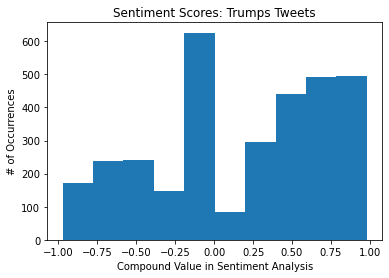

In [17]:
plt.hist(trump_compound)
plt.title('Sentiment Scores: Trumps Tweets')
plt.ylabel('# of Occurrences')
plt.xlabel('Compound Value in Sentiment Analysis')

Text(0.5, 0, 'Compound Value in Sentiment Analysis')

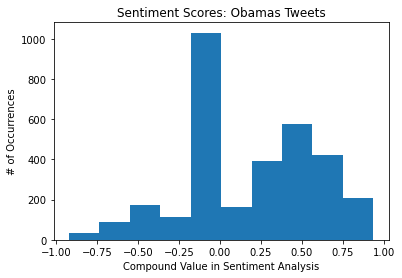

In [18]:
plt.hist(obama_compound)
plt.title('Sentiment Scores: Obamas Tweets')
plt.ylabel('# of Occurrences')
plt.xlabel('Compound Value in Sentiment Analysis')

In [19]:
# Printing examples of the most positively and most negatively scored tweets from each dataframe 

In [26]:
# Trump
print(min(trump_compound))
print(max(trump_compound))

-0.9735
0.9805


In [34]:
trump_min = -0.9735
trump_tweets.loc[trump_tweets['compound'] == trump_min]

,created_at,text,url,replies,retweets,favorites,user,neg,neu,pos,compound,comp_score
1431,4/18/17 10:38,Democrat Jon Ossoff would be a disaster in Con...,https://twitter.com/realDonaldTrump/status/854...,12950,14207,56073,realDonaldTrump,0.555,0.445,0.0,-0.9735,neg


In [35]:
print('Min Tweet:', trump_text[1431])

Min Tweet: Democrat Jon Ossoff would be a disaster in Congress. VERY weak on crime and illegal immigration, bad for jobs and wants higher taxes. Say NO


In [38]:
trump_max = 0.9805
trump_tweets.loc[trump_tweets['compound'] == trump_max]

,created_at,text,url,replies,retweets,favorites,user,neg,neu,pos,compound,comp_score
458,9/7/17 12:33,Hurricane Irma is raging but we have great tea...,https://twitter.com/realDonaldTrump/status/905...,6457,16565,82003,realDonaldTrump,0.046,0.377,0.577,0.9805,pos


In [39]:
print('Max Tweet:', trump_text[458])

Max Tweet: Hurricane Irma is raging but we have great teams of talented and brave people already in place and ready to help. Be careful, be safe! #FEMA


In [40]:
# Obama
print(min(obama_compound))
print(max(obama_compound))

-0.9201
0.9349


In [42]:
obama_min = -0.9201
obama_tweets.loc[obama_tweets['compound'] == obama_min]

,created_at,text,url,replies,retweets,favorites,user,neg,neu,pos,compound,comp_score
453,6/21/16 15:46,RT @POTUS: Gun violence requires more than mom...,https://twitter.com/BarackObama/status/7452818...,4272,64984,120391,BarackObama,0.408,0.592,0.0,-0.9201,neg


In [43]:
print('Min Tweet:', obama_text[453])

Min Tweet: RT @POTUS: Gun violence requires more than moments of silence. It requires action. In failing that test, the Senate failed the American peo‰Û_


In [44]:
obama_max = 0.9349
obama_tweets.loc[obama_tweets['compound'] == obama_max]

,created_at,text,url,replies,retweets,favorites,user,neg,neu,pos,compound,comp_score
723,3/27/16 17:43,"""We wish all who celebrate a blessed and joyfu...",https://twitter.com/BarackObama/status/7141457...,1140,7866,32989,BarackObama,0.0,0.360,0.640,0.9349,pos
1618,8/4/15 21:13,Help President Obama celebrate another great y...,https://twitter.com/BarackObama/status/6286750...,1516,2382,6101,BarackObama,0.0,0.388,0.612,0.9349,pos


In [45]:
print('Max Tweet:', trump_text[723])
print('Max Tweet:', trump_text[1618])

Max Tweet: RT @IvankaTrump: Since @realDonaldTrump inauguration, over 1 million net new jobs have been created in the American economy! #MAGA
Max Tweet: 45,000 construction &amp; manufacturing jobs in the U.S. Gulf Coast region. $20 billion investment. We are already winning again, America!


In [46]:
# Commenting on how the two sets differ

Obama has two tweets that have the same highest compound score. In addition, Obama's highest neg and pos tweets are from 2015-2016 while Trump's is slightly more recent with the highest neg and pos tweets being from 2017. 

### Topic Modeling of Trump & Obama Tweets

In [47]:
# Use gensim and LDA to perform topic modeling on the tweets of each dataframe.